In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR,SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [4]:
!pip install xgboost

  Using cached xgboost-1.6.1-py3-none-win_amd64.whl (125.4 MB)


In [26]:
df = pd.read_csv("water_potability.csv")

In [27]:
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [28]:
df.shape

(3276, 10)

In [29]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<AxesSubplot:>

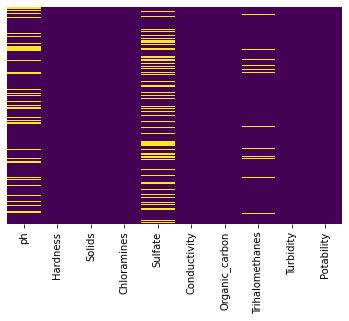

In [30]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis')

Approach used to fill null values:<br />
1. Identify the column with null values<br />
2. Build Co-relation chart<br />
3. Form a new data-set with one column of missing values and other positive co-related values filled data<br />
4. Drop null values and Apply ML model and hyper-parameter tuning to find the best predicted value<br />
5. Repeat the steps 3-4 till all the columns are filled<br />

In [31]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False).round(2)

Sulfate            23.84
ph                 14.99
Trihalomethanes     4.95
Hardness            0.00
Solids              0.00
Chloramines         0.00
Conductivity        0.00
Organic_carbon      0.00
Turbidity           0.00
Potability          0.00
dtype: float64

<AxesSubplot:>

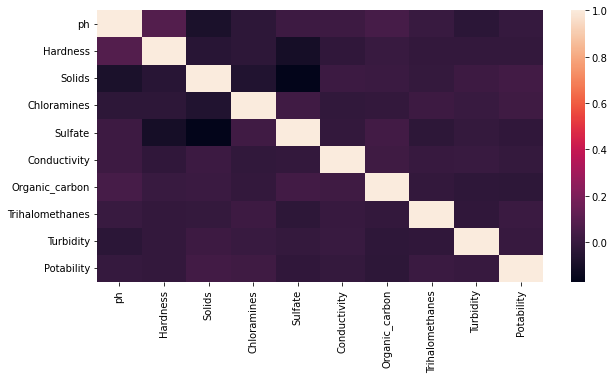

In [32]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr())

In [33]:
df_sul=df[['Sulfate','Organic_carbon','Chloramines']]
df_sul=df_sul.dropna()

In [34]:
scaler=StandardScaler()
scled=scaler.fit_transform(df_sul.drop('Sulfate',axis=1))

In [35]:
x_tr,x_te,y_tr,y_te=train_test_split(scled,df_sul['Sulfate'],random_state=42,test_size=0.3)

In [36]:
svr=SVR()
param_grid={'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
            'degree':[1,2],'gamma':['scale','auto'],
            'C':[1.2,1.3,1.4,1.7]}

gs=GridSearchCV(svr,param_grid=param_grid,n_jobs=-1,cv=3,verbose=3)
gs.fit(X=x_tr,y=y_tr)
sul_pr=gs.predict(x_te)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


In [37]:
sulfatee=gs.predict(scaler.fit_transform(df[['Organic_carbon','Chloramines']]))
df['sulfatee']=sulfatee
df.drop('Sulfate',axis=1,inplace=True)

In [38]:
df

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,sulfatee
0,NaN,204.890455,20791.318981,7.300212,564.308654,10.379783,86.990970,2.963135,0,335.408437
1,3.716080,129.422921,18630.057858,6.635246,592.885359,15.180013,56.329076,4.500656,0,334.885796
2,8.099124,224.236259,19909.541732,9.275884,418.606213,16.868637,66.420093,3.055934,0,332.929631
3,8.316766,214.373394,22018.417441,8.059332,363.266516,18.436524,100.341674,4.628771,0,335.033124
4,9.092223,181.101509,17978.986339,6.546600,398.410813,11.558279,31.997993,4.075075,0,335.021410
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,526.424171,13.894419,66.687695,4.435821,1,334.975351
3272,7.808856,193.553212,17329.802160,8.061362,392.449580,19.903225,NaN,2.798243,1,335.441444
3273,9.419510,175.762646,33155.578218,7.350233,432.044783,11.039070,69.845400,3.298875,1,335.260984
3274,5.126763,230.603758,11983.869376,6.303357,402.883113,11.168946,77.488213,4.708658,1,334.920355


<AxesSubplot:>

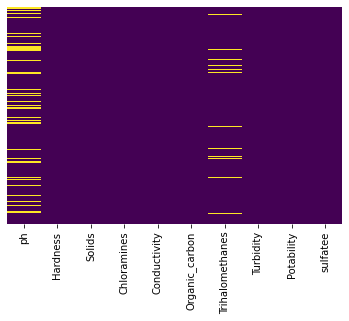

In [39]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis')

Our sulfate column has been cleaned now and renamed as 'sulfatee'

In [40]:
tr_df=df[['Chloramines','Conductivity','Potability','Trihalomethanes']]
tr_df=tr_df.dropna()
tr_sc=scaler.fit_transform(tr_df.drop('Trihalomethanes',axis=1))

In [41]:
tr_tr,tr_te,ytr_tr,yte_te=train_test_split(tr_sc,tr_df['Trihalomethanes'],random_state=42,test_size=0.3)
gs.fit(tr_tr,ytr_tr)
trr=gs.predict(scaler.fit_transform(df[['Chloramines','Conductivity','Potability']]))
df['trr']=trr
df.drop('Trihalomethanes',axis=1,inplace=True)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


In [42]:
df

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,Potability,sulfatee,trr
0,NaN,204.890455,20791.318981,7.300212,564.308654,10.379783,2.963135,0,335.408437,65.776040
1,3.716080,129.422921,18630.057858,6.635246,592.885359,15.180013,4.500656,0,334.885796,65.547685
2,8.099124,224.236259,19909.541732,9.275884,418.606213,16.868637,3.055934,0,332.929631,66.708051
3,8.316766,214.373394,22018.417441,8.059332,363.266516,18.436524,4.628771,0,335.033124,66.739087
4,9.092223,181.101509,17978.986339,6.546600,398.410813,11.558279,4.075075,0,335.021410,66.344148
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,526.424171,13.894419,4.435821,1,334.975351,65.679661
3272,7.808856,193.553212,17329.802160,8.061362,392.449580,19.903225,2.798243,1,335.441444,66.385281
3273,9.419510,175.762646,33155.578218,7.350233,432.044783,11.039070,3.298875,1,335.260984,66.103396
3274,5.126763,230.603758,11983.869376,6.303357,402.883113,11.168946,4.708658,1,334.920355,66.053121


<AxesSubplot:>

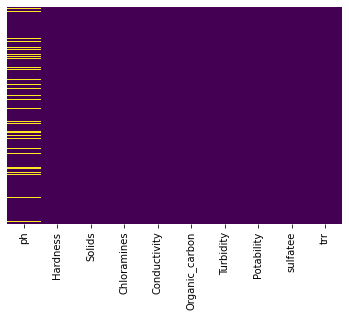

In [43]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis')

Now, our Trihalomethanes columns has been cleaned and renamed as 'trr'

In [44]:
ph_df=df[['ph','Hardness','sulfatee','Conductivity','Organic_carbon','trr']]
ph_df.dropna(inplace=True)
ph_sc=scaler.fit_transform(ph_df.drop('ph',axis=1))

In [45]:
x_tr,x_te,y_tr,y_te=train_test_split(ph_sc,ph_df['ph'],random_state=42,test_size=0.3)
gs.fit(x_tr,y_tr)
phh=gs.predict(df[['Hardness','sulfatee','Conductivity','Organic_carbon','trr']])
df['phh']=phh
df.drop('ph',axis=1,inplace=True)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


<AxesSubplot:>

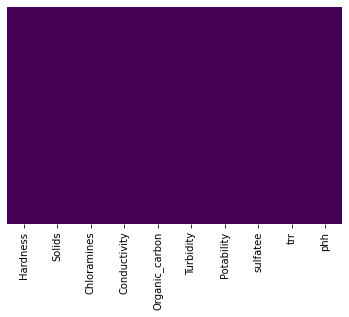

In [46]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis')

Now, our dataset has no null values any more.

In [47]:
df

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,Potability,sulfatee,trr,phh
0,204.890455,20791.318981,7.300212,564.308654,10.379783,2.963135,0,335.408437,65.776040,-16.577460
1,129.422921,18630.057858,6.635246,592.885359,15.180013,4.500656,0,334.885796,65.547685,-39.790177
2,224.236259,19909.541732,9.275884,418.606213,16.868637,3.055934,0,332.929631,66.708051,5.480955
3,214.373394,22018.417441,8.059332,363.266516,18.436524,4.628771,0,335.033124,66.739087,9.305732
4,181.101509,17978.986339,6.546600,398.410813,11.558279,4.075075,0,335.021410,66.344148,-3.708486
...,...,...,...,...,...,...,...,...,...,...
3271,193.681735,47580.991603,7.166639,526.424171,13.894419,4.435821,1,334.975351,65.679661,-15.056523
3272,193.553212,17329.802160,8.061362,392.449580,19.903225,2.798243,1,335.441444,66.385281,0.479735
3273,175.762646,33155.578218,7.350233,432.044783,11.039070,3.298875,1,335.260984,66.103396,-9.003346
3274,230.603758,11983.869376,6.303357,402.883113,11.168946,4.708658,1,334.920355,66.053121,8.965219


Now, our dataframe is free from NULL values

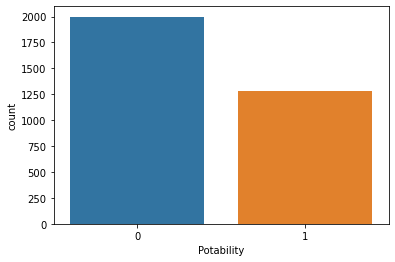

In [22]:
for i in df.columns:
    sns.countplot(df.Potability)

In [23]:
df.describe()

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,Potability,sulfatee,trr,phh
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,196.369496,22014.092526,7.122277,426.205111,14.284970,3.966786,0.390110,334.105131,66.232082,-2.790350
std,32.879761,8768.570828,1.583085,80.824064,3.308162,0.780382,0.487849,1.957700,0.442264,12.927991
min,47.432000,320.942611,0.352000,181.483754,2.200000,1.450000,0.000000,314.179565,64.723828,-50.977701
25%,176.850538,15666.690297,6.127421,365.734414,12.065801,3.439711,0.000000,333.774841,65.935402,-11.555500
50%,196.967627,20927.833607,7.130299,421.884968,14.218338,3.955028,0.000000,334.732249,66.245480,-2.329167
75%,216.667456,27332.762127,8.114887,481.792304,16.557652,4.500320,1.000000,335.039039,66.548174,6.467184
max,323.124000,61227.196008,13.127000,753.342620,28.300000,6.739000,1.000000,337.728326,67.561365,40.257736


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hardness        3276 non-null   float64
 1   Solids          3276 non-null   float64
 2   Chloramines     3276 non-null   float64
 3   Conductivity    3276 non-null   float64
 4   Organic_carbon  3276 non-null   float64
 5   Turbidity       3276 non-null   float64
 6   Potability      3276 non-null   int64  
 7   sulfatee        3276 non-null   float64
 8   trr             3276 non-null   float64
 9   phh             3276 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


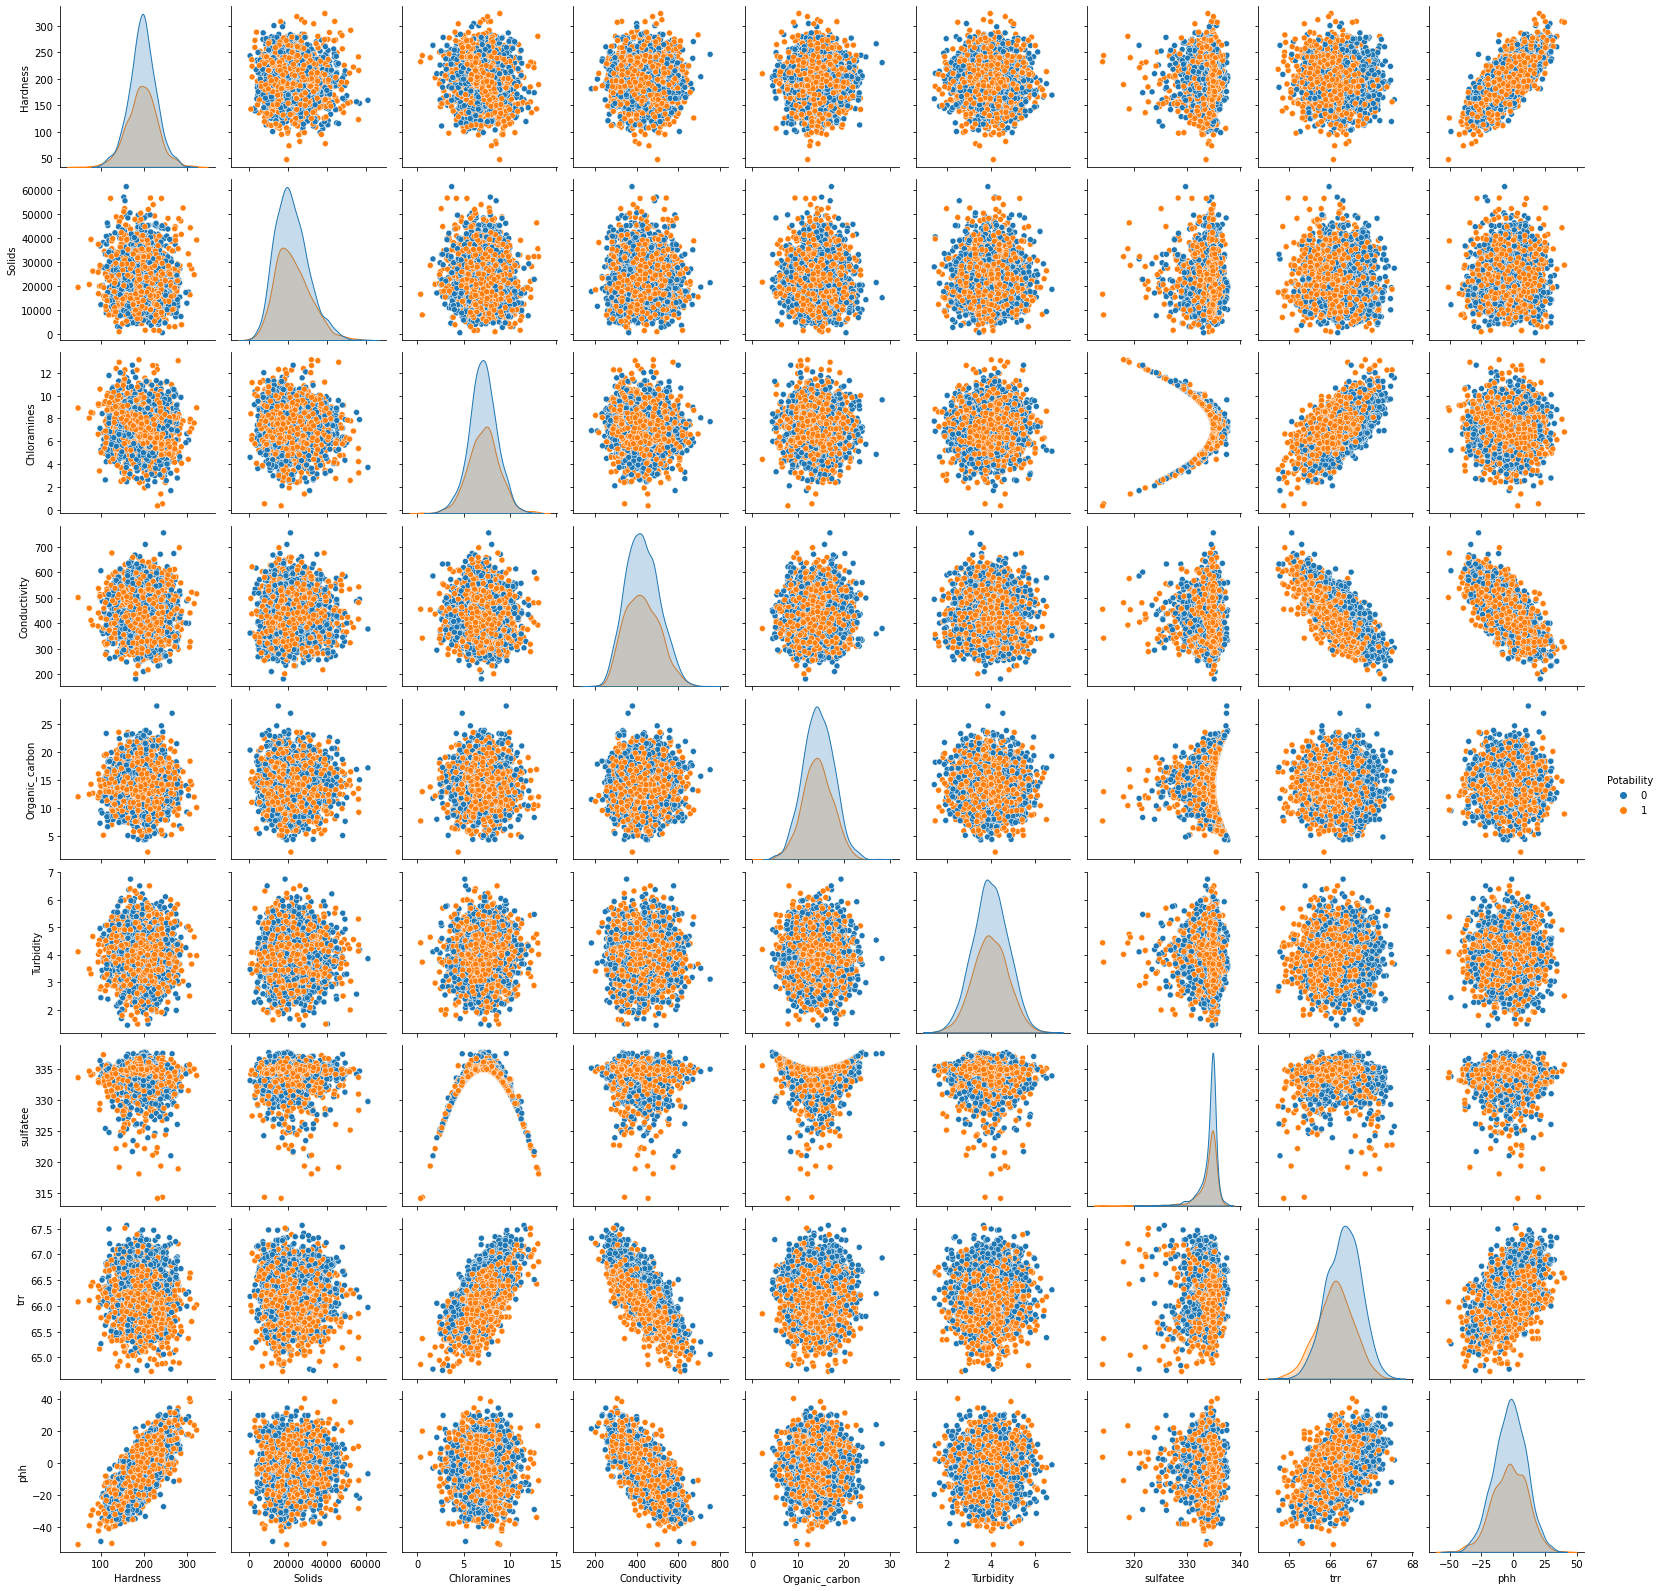

In [25]:
sns.pairplot(df,hue="Potability")

In [53]:
sc = StandardScaler()
X = df.drop('Potability', axis =1)
y = df['Potability']
features = X.columns
X[features] = sc.fit_transform(X[features])
X.tail(10)

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,sulfatee,trr,phh
3266,-0.829891,-0.843065,0.268951,0.474194,-0.968040,1.204173,0.557198,-0.523912,-0.908081
3267,0.568152,-0.694938,-0.521192,-0.442942,-1.325970,0.829280,0.552846,-0.289323,0.698615
3268,0.333131,-0.543749,0.370119,-1.199567,0.584200,-0.671316,0.411423,0.811163,1.094106
3269,-3.089209,1.730846,1.352559,0.169388,0.570732,0.515824,-0.628422,0.345249,-2.208449
3270,-0.295377,0.470466,0.395030,-0.127681,-0.670369,-0.380736,0.426616,0.008892,-0.111347
3271,-0.081758,2.916188,0.028027,1.240155,-0.118075,0.601124,0.444580,-1.249267,-0.948952
3272,-0.085667,-0.534295,0.593290,-0.417706,1.698560,-1.497627,0.682698,0.346449,0.252985
3273,-0.626829,1.270810,0.144017,0.072263,-0.981329,-0.856007,0.590504,-0.291016,-0.480658
3274,1.041355,-1.144058,-0.517373,-0.288597,-0.942064,0.950797,0.416483,-0.404709,0.909450
3275,-0.038546,-0.525812,0.244515,-1.221919,0.560940,-2.124459,0.455388,0.754377,0.859337


In [54]:
X.shape, y.shape

((3276, 9), (3276,))

In [55]:
# import train test split
from sklearn.model_selection import train_test_split
# assign 30% for testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

## Applying models

In [120]:
xgb_params = {
    'booster': ['gbtree', 'dart'],
    'verbosity': [0],
    'eta': np.arange(0.1, 0.2, 0.005),
    'gamma': np.arange(0, 100),
    'max_depth': np.arange(3, 10),
    'tree_method': ['auto', 'exact', 'approx', 'hist'],
    'objective': ['binary:hinge'],
    'eval_metric': ['error', 'auc', 'aucpr']
}
randomized_search_xgb = RandomizedSearchCV(estimator=XGBClassifier(), param_distributions=xgb_params, n_iter=10, cv=5, scoring='accuracy')
randomized_search_xgb.fit(x_train, y_train)
randomized_search_xgb.best_params_

{'verbosity': 0,
 'tree_method': 'exact',
 'objective': 'binary:hinge',
 'max_depth': 5,
 'gamma': 6,
 'eval_metric': 'error',
 'eta': 0.13000000000000003,
 'booster': 'gbtree'}

In [124]:
clf_xgb = XGBClassifier(booster='gbtree', eta=0.13, eval_metric='error', gamma=6, max_depth=5, objective='binary:hinge', tree_method='exact', verbosity=0)

In [125]:
cross_val_xgb = cross_val_score(clf_xgb, x_test, y_test, cv=5)
print('Cross Validation score : ',(cross_val_xgb * 100).mean())
clf_xgb.fit(x_train, y_train)
# prediction
xgb_pred = clf_xgb.predict(x_test)
# accuracy
xgb_acc = accuracy_score(y_test, xgb_pred)
print("The accuracy for Decision Tree is", xgb_acc)
print("The classification report using XG Boost is:")
print(classification_report(y_test, xgb_pred))

Cross Validation score :  91.86159743085051
The accuracy for Decision Tree is 0.9776195320447609
The classification report using XG Boost is:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       585
           1       0.97      0.97      0.97       398

    accuracy                           0.98       983
   macro avg       0.98      0.98      0.98       983
weighted avg       0.98      0.98      0.98       983



<AxesSubplot:>

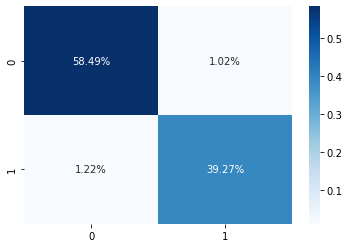

In [126]:
xgb_cm = confusion_matrix(y_test, xgb_pred)
sns.heatmap(xgb_cm/np.sum(xgb_cm), annot = True, fmt = '0.2%', cmap = 'Blues')

In [127]:
RandomForest_params = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth': np.arange(3, 10),
    'min_samples_leaf' : np.arange(1,10),
    'max_features' : ['sqrt', 'log2', 'None'],
    'n_jobs' : [-1]
}
randomized_search_rf = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=RandomForest_params,
                                          n_iter=10, cv=5, scoring='accuracy')
randomized_search_rf.fit(x_train, y_train)
randomized_search_rf.best_params_

{'n_jobs': -1,
 'min_samples_leaf': 3,
 'max_features': 'log2',
 'max_depth': 9,
 'criterion': 'gini'}

In [128]:
clf_rfc = RandomForestClassifier(min_samples_leaf =3, max_features='log2', max_depth=9, criterion = 'gini',n_jobs=-1)
cross_val_rfc = cross_val_score(clf_rfc, x_test, y_test, cv=5)
print('Cross Validation score : ',(cross_val_rfc * 100).mean())
clf_rfc.fit(x_train, y_train)
# prediction
rfc_pred = clf_rfc.predict(x_test)
# accuracy
rfc_acc = accuracy_score(y_test, rfc_pred)
print("The accuracy for Decision Tree is", rfc_acc)
print("The classification report using Random Forest Classifier is:")
print(classification_report(y_test, rfc_pred))

Cross Validation score :  74.46804102351601
The accuracy for Decision Tree is 0.8168870803662258
The classification report using Random Forest Classifier is:
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       585
           1       0.89      0.62      0.73       398

    accuracy                           0.82       983
   macro avg       0.84      0.79      0.80       983
weighted avg       0.83      0.82      0.81       983



<AxesSubplot:>

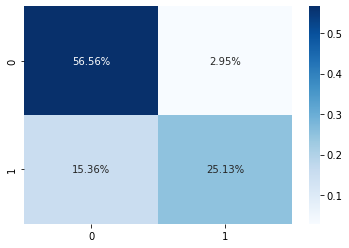

In [129]:
rfc_cm = confusion_matrix(y_test, rfc_pred)
sns.heatmap(rfc_cm/np.sum(rfc_cm), annot = True, fmt = '0.2%', cmap = 'Blues')

In [130]:
DecisionTree_params = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_depth': np.arange(3, 10),
    'min_samples_split' : np.arange(1,20),
    'max_leaf_nodes' : np.arange(0,10),
    'min_samples_leaf' : np.arange(1,10),
    'max_features' : ['sqrt', 'log2', 'None']
}
randomized_search_dt = RandomizedSearchCV(estimator=DecisionTreeClassifier(), param_distributions=DecisionTree_params,
                                          n_iter=10, cv=5, scoring='accuracy')
randomized_search_dt.fit(x_train, y_train)
randomized_search_dt.best_params_

{'min_samples_split': 19,
 'min_samples_leaf': 4,
 'max_leaf_nodes': 7,
 'max_features': 'sqrt',
 'max_depth': 4,
 'criterion': 'entropy'}

In [131]:
clf_dtc = DecisionTreeClassifier(min_samples_split = 19, min_samples_leaf = 4, max_leaf_nodes = 7,
                                 max_features = 'sqrt', max_depth = 4, criterion = 'entropy')
cross_val_dtc = cross_val_score(clf_dtc, x_test, y_test, cv=5)
print('Cross Validation score : ',(cross_val_dtc * 100).mean())
clf_dtc.fit(x_train, y_train)
# prediction
dtc_pred = clf_dtc.predict(x_test)
# accuracy
dtc_acc = accuracy_score(y_test, dtc_pred)
print("The accuracy for Decision Tree is", dtc_acc)
print("The classification report using Logistic Regression is:")
print(classification_report(y_test, dtc_pred))

Cross Validation score :  60.02641665803377
The accuracy for Decision Tree is 0.641912512716175
The classification report using Logistic Regression is:
              precision    recall  f1-score   support

           0       0.66      0.83      0.73       585
           1       0.59      0.36      0.45       398

    accuracy                           0.64       983
   macro avg       0.63      0.60      0.59       983
weighted avg       0.63      0.64      0.62       983



<AxesSubplot:>

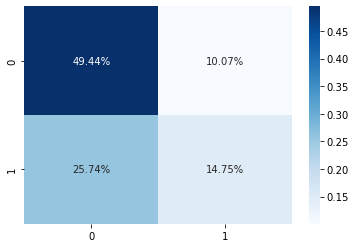

In [132]:
dtc_cm = confusion_matrix(y_test, dtc_pred)
sns.heatmap(dtc_cm/np.sum(dtc_cm), annot = True, fmt = '0.2%', cmap = 'Blues')

In [133]:
lr_params = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'class_weight' : ['dict','balanced'],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
randomized_search_lr = RandomizedSearchCV(estimator=LogisticRegression(), param_distributions=lr_params,
                                          n_iter=10, cv=5, scoring='accuracy')
randomized_search_lr.fit(x_train, y_train)
randomized_search_lr.best_params_

{'solver': 'lbfgs', 'penalty': 'none', 'class_weight': 'balanced', 'C': 1000}

In [134]:
clf_lr = LogisticRegression(solver='lbfgs',penalty='none',class_weight='balanced',C=1000)
cross_val_lr = cross_val_score(clf_lr, x_test, y_test, cv=5)
print('Cross Validation score : ',(cross_val_lr * 100).mean())
clf_lr.fit(x_train,y_train)
# prediction
lr_pred = clf_lr.predict(x_test)
lr_acc = accuracy_score(y_test, lr_pred)
print("The accuracy for Logistic Regression is", lr_acc)
print("The classification report using Logistic Regression is:")
print(classification_report(y_test, lr_pred))

Cross Validation score :  100.0
The accuracy for Logistic Regression is 1.0
The classification report using Logistic Regression is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       585
           1       1.00      1.00      1.00       398

    accuracy                           1.00       983
   macro avg       1.00      1.00      1.00       983
weighted avg       1.00      1.00      1.00       983



<AxesSubplot:>

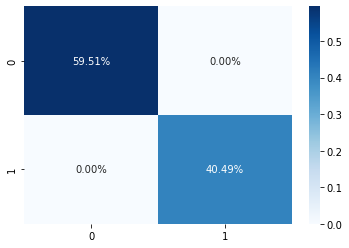

In [135]:
lr_cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(lr_cm/np.sum(lr_cm), annot = True, fmt = '0.2%', cmap = 'Blues')

In [136]:
k_range = list(range(1, 31))
knn_params = dict(n_neighbors=k_range)
randomized_search_knn = RandomizedSearchCV(estimator=KNeighborsClassifier(), param_distributions=knn_params,
                                          n_iter=10, cv=5, scoring='accuracy')
randomized_search_knn.fit(x_train, y_train)
randomized_search_knn.best_params_

{'n_neighbors': 7}

In [137]:
clf_knn = KNN(n_neighbors=7)
cross_val_knn = cross_val_score(clf_knn, x_test, y_test, cv=5)
print('Cross Validation score : ',(cross_val_knn * 100).mean())
# model training
clf_knn.fit(x_train, y_train)
# prediction
KNN_pred = clf_knn.predict(x_test)
# accuracy
KNN_acc = accuracy_score(y_test, KNN_pred)
print("The accuracy for KNeighbors is", KNN_acc)
print(classification_report(y_test, KNN_pred))

Cross Validation score :  61.45084429710971
The accuracy for KNeighbors is 0.6948118006103764
              precision    recall  f1-score   support

           0       0.69      0.88      0.77       585
           1       0.70      0.43      0.53       398

    accuracy                           0.69       983
   macro avg       0.70      0.65      0.65       983
weighted avg       0.70      0.69      0.68       983



<AxesSubplot:>

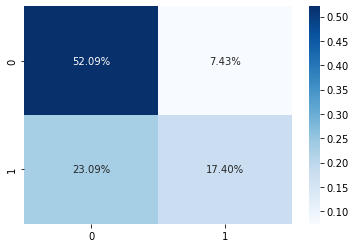

In [138]:
KNN_cm = confusion_matrix(y_test, KNN_pred)
sns.heatmap(KNN_cm/np.sum(KNN_cm), annot = True, fmt = '0.2%', cmap = 'Blues')

In [98]:
svm_params = {
    'C': [0.1,1, 10, 100], 
    'gamma': [1,0.1,0.01,0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}
randomized_search_svm = RandomizedSearchCV(estimator=SVC(), param_distributions=svm_params,
                                          n_iter=10, cv=5, scoring='accuracy')
randomized_search_svm.fit(x_train, y_train)
randomized_search_svm.best_params_

{'kernel': 'rbf', 'gamma': 0.001, 'C': 100}

In [29]:
clf_svc = SVC(kernel='rbf',gamma=0.001,C=100)
cross_val_svc = cross_val_score(clf_svc, x_test, y_test, cv=5)
print('Cross Validation score : ',(cross_val_svc * 100).mean())
# model training
clf_svc.fit(x_train, y_train)
# prediction
SVM_pred = clf_svc.predict(x_test)
# accuracy
SVM_acc = accuracy_score(y_test, SVM_pred)
print("The accuracy for SVM is", SVM_acc)
print(classification_report(y_test, SVM_pred))

Cross Validation score :  100.0
The accuracy for SVM is 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       585
           1       1.00      1.00      1.00       398

    accuracy                           1.00       983
   macro avg       1.00      1.00      1.00       983
weighted avg       1.00      1.00      1.00       983



<AxesSubplot:>

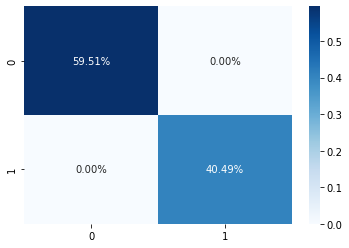

In [101]:
SVM_cm = confusion_matrix(y_test, SVM_pred)
sns.heatmap(SVM_cm/np.sum(SVM_cm), annot = True, fmt = '0.2%', cmap = 'Blues')

In [139]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNeighbours', 'SVM'],
    'Accuracy' :[lr_acc, dtc_acc, rfc_acc, xgb_acc, KNN_acc, SVM_acc]
})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,1.000000
5,SVM,1.000000
3,XGBoost,0.977620
2,Random Forest,0.816887
4,KNeighbours,0.694812
1,Decision Tree,0.641913


<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

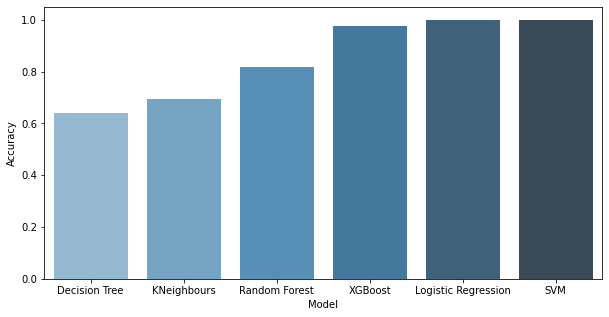

In [140]:
plt.figure(figsize=(10,5))
sns.barplot(x='Model', y='Accuracy', data = models, 
            order = models.sort_values("Accuracy").Model,
           palette = 'Blues_d')

## SVM has the highest accuracy

In [144]:
import tensorflow as tf
#Initialising ANN
ann = tf.keras.models.Sequential()
 #Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
 #Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

 #Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
#Fitting ANN
ann.fit(x_train,y_train,batch_size=32,epochs = 100)


Epoch 1/100
72/72 [==============================] - 1s 1ms/step - loss: 0.7531 - accuracy: 0.4605
Epoch 2/100
72/72 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.5683
Epoch 3/100
72/72 [==============================] - 0s 1ms/step - loss: 0.6711 - accuracy: 0.6184
Epoch 4/100
72/72 [==============================] - 0s 1ms/step - loss: 0.6610 - accuracy: 0.6337
Epoch 5/100
72/72 [==============================] - 0s 1ms/step - loss: 0.6536 - accuracy: 0.6398
Epoch 6/100
72/72 [==============================] - 0s 1ms/step - loss: 0.6462 - accuracy: 0.6494
Epoch 7/100
72/72 [==============================] - 0s 1ms/step - loss: 0.6377 - accuracy: 0.6577
Epoch 8/100
72/72 [==============================] - 0s 1ms/step - loss: 0.6270 - accuracy: 0.6651
Epoch 9/100
72/72 [==============================] - 0s 1ms/step - loss: 0.6107 - accuracy: 0.6821
Epoch 10/100
72/72 [==============================] - 0s 1ms/step - loss: 0.5826 - accuracy: 0.7200
Epoch 11/

# With mean Parameters

Cross Validation score :  87.28581788045167
The accuracy for Decision Tree is 0.9694811800610377
The classification report using XG Boost is:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       585
           1       0.97      0.96      0.96       398

    accuracy                           0.97       983
   macro avg       0.97      0.97      0.97       983
weighted avg       0.97      0.97      0.97       983



<AxesSubplot:>

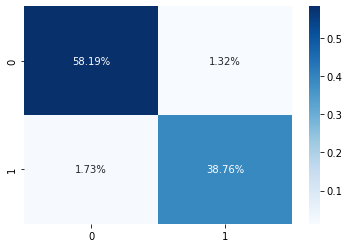

In [64]:
clf_xgb = XGBClassifier(booster='dart', eta=0.165, eval_metric='error', gamma=7, max_depth=9, objective='binary:hinge', tree_method='auto', verbosity=0)

cross_val_xgb = cross_val_score(clf_xgb, x_test, y_test, cv=5)
print('Cross Validation score : ',(cross_val_xgb * 100).mean())
clf_xgb.fit(x_train, y_train)
# prediction
xgb_pred = clf_xgb.predict(x_test)
# accuracy
xgb_acc = accuracy_score(y_test, xgb_pred)
print("The accuracy for Decision Tree is", xgb_acc)
print("The classification report using XG Boost is:")
print(classification_report(y_test, xgb_pred))

xgb_cm = confusion_matrix(y_test, xgb_pred)
sns.heatmap(xgb_cm/np.sum(xgb_cm), annot = True, fmt = '0.2%', cmap = 'Blues')

Cross Validation score :  73.55122759763803
The accuracy for Decision Tree is 0.8362156663275687
The classification report using Random Forest Classifier is:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       585
           1       0.90      0.67      0.77       398

    accuracy                           0.84       983
   macro avg       0.85      0.81      0.82       983
weighted avg       0.85      0.84      0.83       983



<AxesSubplot:>

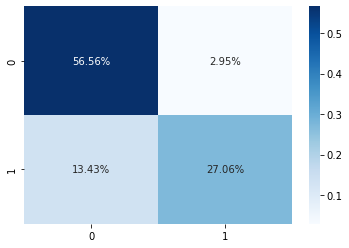

In [65]:
clf_rfc = RandomForestClassifier(min_samples_leaf =3, max_features='log2', max_depth=9, criterion = 'gini',n_jobs=-1)
cross_val_rfc = cross_val_score(clf_rfc, x_test, y_test, cv=5)
print('Cross Validation score : ',(cross_val_rfc * 100).mean())
clf_rfc.fit(x_train, y_train)
# prediction
rfc_pred = clf_rfc.predict(x_test)
# accuracy
rfc_acc = accuracy_score(y_test, rfc_pred)
print("The accuracy for Decision Tree is", rfc_acc)
print("The classification report using Random Forest Classifier is:")
print(classification_report(y_test, rfc_pred))

rfc_cm = confusion_matrix(y_test, rfc_pred)
sns.heatmap(rfc_cm/np.sum(rfc_cm), annot = True, fmt = '0.2%', cmap = 'Blues')

Cross Validation score :  100.0
The accuracy for Logistic Regression is 1.0
The classification report using Logistic Regression is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       585
           1       1.00      1.00      1.00       398

    accuracy                           1.00       983
   macro avg       1.00      1.00      1.00       983
weighted avg       1.00      1.00      1.00       983



<AxesSubplot:>

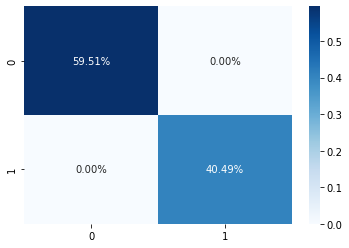

In [66]:
clf_lr = LogisticRegression(solver='lbfgs',penalty='none',class_weight='balanced',C=1000)
cross_val_lr = cross_val_score(clf_lr, x_test, y_test, cv=5)
print('Cross Validation score : ',(cross_val_lr * 100).mean())
clf_lr.fit(x_train,y_train)
# prediction
lr_pred = clf_lr.predict(x_test)
lr_acc = accuracy_score(y_test, lr_pred)
print("The accuracy for Logistic Regression is", lr_acc)
print("The classification report using Logistic Regression is:")
print(classification_report(y_test, lr_pred))

lr_cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(lr_cm/np.sum(lr_cm), annot = True, fmt = '0.2%', cmap = 'Blues')

Cross Validation score :  100.0
The accuracy for SVM is 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       585
           1       1.00      1.00      1.00       398

    accuracy                           1.00       983
   macro avg       1.00      1.00      1.00       983
weighted avg       1.00      1.00      1.00       983



<AxesSubplot:>

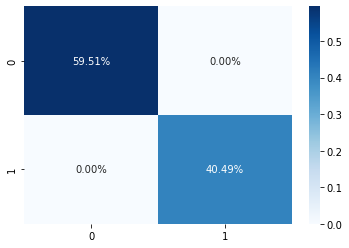

In [67]:
clf_svc = SVC(kernel='rbf',gamma=0.001,C=100)
cross_val_svc = cross_val_score(clf_svc, x_test, y_test, cv=5)
print('Cross Validation score : ',(cross_val_svc * 100).mean())
# model training
clf_svc.fit(x_train, y_train)
# prediction
SVM_pred = clf_svc.predict(x_test)
# accuracy
SVM_acc = accuracy_score(y_test, SVM_pred)
print("The accuracy for SVM is", SVM_acc)
print(classification_report(y_test, SVM_pred))

SVM_cm = confusion_matrix(y_test, SVM_pred)
sns.heatmap(SVM_cm/np.sum(SVM_cm), annot = True, fmt = '0.2%', cmap = 'Blues')

Cross Validation score :  61.45084429710971
The accuracy for KNeighbors is 0.6948118006103764
              precision    recall  f1-score   support

           0       0.69      0.88      0.77       585
           1       0.70      0.43      0.53       398

    accuracy                           0.69       983
   macro avg       0.70      0.65      0.65       983
weighted avg       0.70      0.69      0.68       983



<AxesSubplot:>

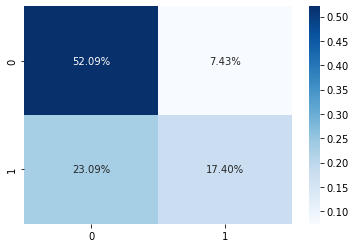

In [71]:
clf_knn = KNN(n_neighbors=7)
cross_val_knn = cross_val_score(clf_knn, x_test, y_test, cv=5)
print('Cross Validation score : ',(cross_val_knn * 100).mean())
# model training
clf_knn.fit(x_train, y_train)
# prediction
KNN_pred = clf_knn.predict(x_test)
# accuracy
KNN_acc = accuracy_score(y_test, KNN_pred)
print("The accuracy for KNeighbors is", KNN_acc)
print(classification_report(y_test, KNN_pred))

KNN_cm = confusion_matrix(y_test, KNN_pred)
sns.heatmap(KNN_cm/np.sum(KNN_cm), annot = True, fmt = '0.2%', cmap = 'Blues')

In [72]:
models = pd.DataFrame({
    'Model':['Logistic Regression','Random Forest', 'XGBoost','SVM','KNN'],
    'Accuracy' :[lr_acc, rfc_acc, xgb_acc, SVM_acc,KNN_acc]
})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,1.000000
3,SVM,1.000000
2,XGBoost,0.969481
1,Random Forest,0.836216
4,KNN,0.694812


<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

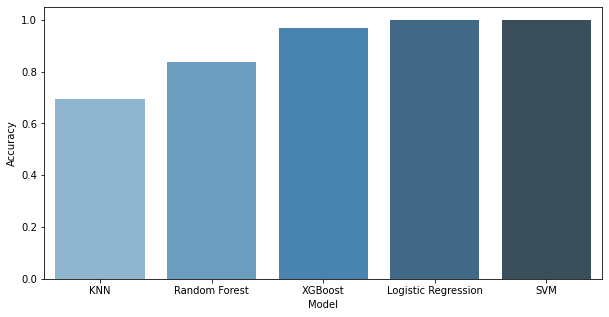

In [73]:
plt.figure(figsize=(10,5))
sns.barplot(x='Model', y='Accuracy', data = models, 
            order = models.sort_values("Accuracy").Model,
           palette = 'Blues_d')

In [48]:
import pickle

In [32]:
# save the model to pickle
filename = 'water_potability.sav'
pickle.dump(clf_svc, open(filename, 'wb'))

In [56]:
# load the model from disk
model = pickle.load(open('water_potability.sav', 'rb'))
result = model.score(x_test, y_test)
print(result)

1.0


In [83]:
a = df.iloc[1200:1300,:]
a.drop('Potability',axis = 1,inplace = True)
a = sca.transform(a)
model.predict(a)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [91]:
pickle.dump(sc,open('Scaler.pkl','wb'))

In [92]:
sca = pickle.load(open('Scaler.pkl','rb'))